# Getting Data from MTA Yellow Taxi

In [1]:
import pandas as pd
import requests
import re
from tqdm import tqdm
import time
import os
import glob
import math

In [2]:

from bs4 import BeautifulSoup
  
URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
r = requests.get(URL)
  
soup = BeautifulSoup(r.content, 'html5lib') 
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7"><![endif]-->
<!--[if IE 7]><html class="no-js lt-ie9 lt-ie8 ie7"><![endif]-->
<!--[if IE 8]><html class="no-js lt-ie9"><![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   TLC Trip Record Data - TLC
  </title>
  <!--
					ls:begin[stylesheet]
				-->
  <link href="/iwov-resources/fixed-layout/3-Row Simple.css" rel="stylesheet" type="text/css"/>
  <!--
					ls:end[stylesheet]
				-->
  <!--
					ls:begin[meta-keywords]
				-->
  <meta content="" name="keywords"/>
  <!--
					ls:end[meta-keywords]
				-->
  <!--
					ls:begin[meta-description]
				-->
  <meta content="" name="description"/>
  <!--
					ls:end[meta-description]
				-->
  <!--
					ls:begin[meta-vpath]
				-->
  <meta content="" name="vpath"/>
  <!--
					ls:end[meta-vpath]
				-->
  <!--
					ls:begin[meta-page-locale-name]
				-->
  <me

In [3]:
soup = BeautifulSoup(r.content)
table = soup.find_all('a',title="Yellow Taxi Trip Records")

In [4]:
table

[<a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-02.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-03.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-04.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-05.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-06.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://nyc-tlc.s3.amazonaws.com/trip+data/yellow_tripdata_2021-07.csv" title="Yellow Taxi Trip Records">Yellow Taxi Tri

In [5]:
type(table)

bs4.element.ResultSet

In [6]:

links=[]
for row in table:
    match = re.search(r'href=[\'"]?([^\'" >]+)', str(row))
    if match:
        links.append(str(match.group(1)))

In [7]:
links

['https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-06.csv',
 'https://nyc-tlc.s3.amazonaws.com/trip+data/yellow_tripdata_2021-07.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-06.csv',
 'https://nyc-tlc.s3.amaz

In [8]:
pattern = r"(?P<prefix>.*)(?P<tripdata>tripdata_)(?P<year>[0-9]{4})-(?P<month>[0-9]{2})(?P<rest>.*)"
newlinks=[]
for eachlink in links:
    match=re.search(pattern,eachlink)
    year=int(match.group("year"))
    month=int(match.group("month"))
    
    if (year>=2009) and (year<2015):
        newlinks.append(eachlink)
    elif (year==2015) and (month<=6):
        newlinks.append(eachlink)

In [9]:
newlinks

['https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-06.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-06.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-07.csv',
 'https://s3.amazonaws.co

In [10]:
def download_file(url):
    if not(os.path.exists("data")):
        os.mkdir("data")
    local_filename = url.split('/')[-1]
    local_filename="C:\\Users\\Kunal\\Desktop\\TFA\\data\\"+local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

In [59]:
# #DO NOT RUN-----------------------------------------------------------
# for i in tqdm(range(len(newlinks))):
#     eachlink=newlinks[i]
#     download_file(eachlink)
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 78/78 [1:31:52<00:00, 70.67s/it]


In [11]:
path = "C:\\Users\\Kunal\\Desktop\\TFA\\data"
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [25]:
subset=pd.read_csv("C:\\Users\\Kunal\\Desktop\\TFA\\start.csv",on_bad_lines='skip')
df=pd.DataFrame()
mapping = {subset.columns[0]: 'vendor_name', 
           subset.columns[1]: 'Trip_Pickup_DateTime', 
           subset.columns[2]: 'Trip_Dropoff_DateTime', 
           subset.columns[3]: 'Passenger_Count',
           subset.columns[4]:'Trip_Distance', 
           subset.columns[5]:'Start_Lon', 
           subset.columns[6]:'Start_Lat',
           subset.columns[7]:'Rate_Code',
           subset.columns[8]:'store_and_forward',
           subset.columns[9]:'End_Lon',
           subset.columns[10]:'End_Lat',
           subset.columns[11]:'Payment_Type',
           subset.columns[12]:'Fare_Amt',
           subset.columns[13]:'surcharge',
           subset.columns[14]:'mta_tax',
           subset.columns[15]:'Tip_Amt',
           subset.columns[16]:'Tolls_Amt',
           subset.columns[17]:'Total_Amt'}

In [29]:
masterdf=pd.DataFrame()
for i in tqdm(range(len(csv_files))):
#     print(csv_files[i])
#     if(i<11):
#         continue
    df = df[0:0]   
    df = pd.read_csv(csv_files[i],on_bad_lines='skip')
    subset=df.sample(n=3000)
    if len(subset.columns)>18:
        subset=subset.drop(columns=["improvement_surcharge"],errors='ignore')
#         print("here")
    tempdf=subset
    tempdf.columns=mapping
    masterdf=masterdf.append(tempdf,ignore_index=True)
    subset.to_csv(r"C:\Users\Kunal\Desktop\TFA\sample\subset" +str(i)+ ".csv",index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [41:19<00:00, 31.79s/it]


In [30]:
len(masterdf)

234000

In [31]:
masterdf.to_csv("masterdf.csv",index=False)

In [22]:
masterdf.columns=['name', 'vendor_name', 'Trip_Pickup_DateTime',
       'Trip_Dropoff_DateTime', 'Passenger_Count', 'Trip_Distance',
       'Start_Lon', 'Start_Lat', 'Rate_Code', 'store_and_forward', 'End_Lon',
       'End_Lat', 'Payment_Type', 'Fare_Amt', 'surcharge', 'mta_tax',
       'Tip_Amt', 'Tolls_Amt']

In [23]:
masterdf.columns

Index(['name', 'vendor_name', 'Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime',
       'Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat',
       'Rate_Code', 'store_and_forward', 'End_Lon', 'End_Lat', 'Payment_Type',
       'Fare_Amt', 'surcharge', 'mta_tax', 'Tip_Amt', 'Tolls_Amt'],
      dtype='object')

# Distance function

* Calculate distance between pickup and drop location using math module

In [10]:
def distance(series):
    lat1, lon1 = float(series["Start_Lat"]),float(series["Start_Lon"])
    lat2, lon2 = float(series["End_Lat"]),float(series["End_Lon"])
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

# Outside Area Trip Removal Function 

* Remove trips that start and/or end outside of the latitude/longitude coordinate box: (40.560445, -74.242330) and (40.908524, -73.717047). 

In [22]:
def outside(dataframe):
    dataframe = dataframe[ (dataframe['Start_Lat'] >= 40.560445) & (dataframe['Start_Lat'] <= 40.908524)]
    dataframe = dataframe[ (dataframe['End_Lat'] >= 40.560445) & (dataframe['End_Lat'] <= 40.908524)]
    dataframe = dataframe[ (dataframe['Start_Lon'] >= -74.242330) & (dataframe['Start_Lon'] <= -73.717047)]
    dataframe = dataframe[ (dataframe['End_Lon'] >= -74.242330) & (dataframe['End_Lon'] <= -73.717047)]
    return dataframe
    

# Data Cleaning

-  __Yellow Taxi Data__

In [43]:
yellowdf=pd.read_csv("masterdf.csv")

C:\Users\Kunal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
yellowdf.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,CMT,2009-01-13 07:54:28,2009-01-13 08:00:10,2,0.60,-73.961570,40.768545,NaN,NaN,-73.963642,40.774218,Cash,4.9,0.0,NaN,0.0,0.00,4.90
1,CMT,2009-01-22 09:02:19,2009-01-22 09:45:48,1,21.10,-73.914399,40.746171,NaN,NaN,-73.816812,40.703619,Cash,49.3,0.0,NaN,0.0,0.00,49.30
2,CMT,2009-01-23 23:52:45,2009-01-24 00:13:43,1,10.70,-73.874395,40.774010,NaN,NaN,-73.981739,40.765671,Cash,25.8,0.0,NaN,0.0,4.15,29.95
3,CMT,2009-01-06 18:34:58,2009-01-06 18:43:57,1,3.60,-73.957687,40.765477,NaN,NaN,-73.977345,40.729237,Credit,11.1,0.0,NaN,1.0,0.00,12.10
4,VTS,2009-01-02 09:52:00,2009-01-02 10:02:00,1,2.02,-74.000105,40.761962,NaN,NaN,-73.971110,40.759072,Credit,7.7,0.0,NaN,2.0,0.00,9.70


In [45]:
yellowdf["Date"] = yellowdf["Trip_Pickup_DateTime"].astype("datetime64")

In [46]:
yellowdf.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt,Date
0,CMT,2009-01-13 07:54:28,2009-01-13 08:00:10,2,0.60,-73.961570,40.768545,NaN,NaN,-73.963642,40.774218,Cash,4.9,0.0,NaN,0.0,0.00,4.90,2009-01-13 07:54:28
1,CMT,2009-01-22 09:02:19,2009-01-22 09:45:48,1,21.10,-73.914399,40.746171,NaN,NaN,-73.816812,40.703619,Cash,49.3,0.0,NaN,0.0,0.00,49.30,2009-01-22 09:02:19
2,CMT,2009-01-23 23:52:45,2009-01-24 00:13:43,1,10.70,-73.874395,40.774010,NaN,NaN,-73.981739,40.765671,Cash,25.8,0.0,NaN,0.0,4.15,29.95,2009-01-23 23:52:45
3,CMT,2009-01-06 18:34:58,2009-01-06 18:43:57,1,3.60,-73.957687,40.765477,NaN,NaN,-73.977345,40.729237,Credit,11.1,0.0,NaN,1.0,0.00,12.10,2009-01-06 18:34:58
4,VTS,2009-01-02 09:52:00,2009-01-02 10:02:00,1,2.02,-74.000105,40.761962,NaN,NaN,-73.971110,40.759072,Credit,7.7,0.0,NaN,2.0,0.00,9.70,2009-01-02 09:52:00


In [47]:
yellowdf["Distance"]=yellowdf.apply(distance,axis=1)

In [48]:
yellowdf.dtypes

vendor_name                      object
Trip_Pickup_DateTime             object
Trip_Dropoff_DateTime            object
Passenger_Count                   int64
Trip_Distance                   float64
Start_Lon                       float64
Start_Lat                       float64
Rate_Code                       float64
store_and_forward                object
End_Lon                         float64
End_Lat                         float64
Payment_Type                     object
Fare_Amt                        float64
surcharge                       float64
mta_tax                         float64
Tip_Amt                         float64
Tolls_Amt                       float64
Total_Amt                       float64
Date                     datetime64[ns]
Distance                        float64
dtype: object

In [50]:
yellowdf.drop(columns=["vendor_name","Passenger_Count","Rate_Code","store_and_forward","Payment_Type","Fare_Amt","surcharge","mta_tax","Tolls_Amt"],errors="ignore",inplace=True)
yellowdf.head()

,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Tip_Amt,Total_Amt,Date,Distance
0,2009-01-13 07:54:28,2009-01-13 08:00:10,0.60,-73.961570,40.768545,-73.963642,40.774218,0.0,4.90,2009-01-13 07:54:28,0.654495
1,2009-01-22 09:02:19,2009-01-22 09:45:48,21.10,-73.914399,40.746171,-73.816812,40.703619,0.0,49.30,2009-01-22 09:02:19,9.487619
2,2009-01-23 23:52:45,2009-01-24 00:13:43,10.70,-73.874395,40.774010,-73.981739,40.765671,0.0,29.95,2009-01-23 23:52:45,9.087111
3,2009-01-06 18:34:58,2009-01-06 18:43:57,3.60,-73.957687,40.765477,-73.977345,40.729237,1.0,12.10,2009-01-06 18:34:58,4.356703
4,2009-01-02 09:52:00,2009-01-02 10:02:00,2.02,-74.000105,40.761962,-73.971110,40.759072,2.0,9.70,2009-01-02 09:52:00,2.463129


## Removing Rows with very high distance and 0 distance (outliers)

In [51]:
print(yellowdf["Distance"].mean())
print(len(yellowdf))

20.438946381021086
234000


In [52]:
yellowdf = yellowdf[yellowdf['Distance'] <= 50]
yellowdf = yellowdf[yellowdf['Distance'] != 0]

In [53]:
#removing trips with 0 longitude or 0 longitude

yellowdf = yellowdf[yellowdf['Start_Lon'] != 0]
yellowdf = yellowdf[yellowdf['Start_Lat'] != 0]
yellowdf = yellowdf[yellowdf['End_Lon'] != 0]
yellowdf = yellowdf[yellowdf['End_Lat'] != 0]

#removing trips with 0 total amount

yellowdf = yellowdf[yellowdf['Total_Amt'] != 0]

* Removing trips outside latitude/longitude box

In [54]:
yellowdf=outside(yellowdf)

In [55]:
print(yellowdf["Distance"].mean())
print(len(yellowdf))

3.344135578783831
226373


# Importing Uber Data

In [63]:
uberdf=pd.read_csv("uber_rides_sample.csv")

In [64]:
uberdf.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [65]:
uberdf=uberdf.drop(columns=["Unnamed: 0","passenger_count"],errors="ignore")
uberdf.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247


In [66]:
uberdf.rename(columns = {'pickup_latitude' : 'Start_Lat', 
                         'pickup_longitude' : 'Start_Lon', 
                         'dropoff_latitude' : 'End_Lat' ,
                         'dropoff_longitude' : 'End_Lon' , 
                         'fare_amount' : 'Total_Amt',
                         'pickup_datetime' : 'Trip_Pickup_DateTime'}, 
              inplace = True,errors="ignore")
uberdf.head()

,key,Total_Amt,Trip_Pickup_DateTime,Start_Lon,Start_Lat,End_Lon,End_Lat
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247


In [67]:
uberdf["Date"] = uberdf["Trip_Pickup_DateTime"].astype("datetime64")

In [68]:
uberdf["Distance"]=uberdf.apply(distance,axis=1)

In [69]:
uberdf.head()

,key,Total_Amt,Trip_Pickup_DateTime,Start_Lon,Start_Lat,End_Lon,End_Lat,Date,Distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,2015-05-07 19:52:06,1.683323
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,2009-07-17 20:04:56,2.457590
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,2009-08-24 21:45:00,5.036377
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,2009-06-26 08:22:21,1.661683
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,2014-08-28 17:47:00,4.475450


<AxesSubplot:xlabel='Date'>

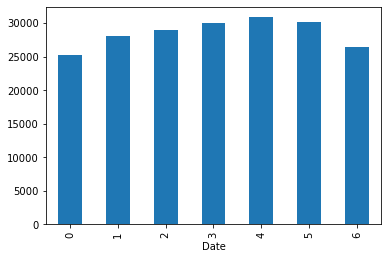

In [70]:
uberdf["Distance"].groupby(uberdf["Date"].dt.weekday).count().plot(kind="bar")

## Removing Rows with very high distance and 0 distance (outliers)

In [71]:
print(uberdf["Distance"].mean())
print(len(uberdf))

20.855349825361202
200000


In [72]:
uberdf = uberdf[uberdf['Distance'] <= 50]
uberdf = uberdf[uberdf['Distance'] != 0]

In [74]:
#removing trips with 0 longitude or 0 longitude

uberdf = uberdf[uberdf['Start_Lon'] != 0]
uberdf = uberdf[uberdf['Start_Lat'] != 0]
uberdf = uberdf[uberdf['End_Lon'] != 0]
uberdf = uberdf[uberdf['End_Lat'] != 0]

#removing trips with 0 total amount

uberdf = uberdf[uberdf['Total_Amt'] != 0]

* Removing trips outside latitude/longitude box

In [75]:
uberdf=outside(uberdf)

In [76]:
print(uberdf["Distance"].mean())
print(len(uberdf))

3.33772817297078
193512


# Creating dataframe combining yellow taxi and uber data

In [103]:
#Adding a column 'Type' to identify whether Taxi was Uber or Yellow

uberdf_flag=uberdf
uberdf_flag["Type"]="Uber"

yellowdf_flag=yellowdf
yellowdf_flag["Type"]="Yellow"


df_list = [uberdf_flag[['Total_Amt', 'Trip_Pickup_DateTime', 'Start_Lon', 'Start_Lat',
       'End_Lon', 'End_Lat', 'Date', 'Distance','Type']],yellowdf_flag[['Total_Amt', 'Trip_Pickup_DateTime', 'Start_Lon', 'Start_Lat',
       'End_Lon', 'End_Lat', 'Date', 'Distance','Type']]]
tdf=pd.concat(df_list, ignore_index=True)

In [106]:
tdf.sample(n=10)

,Total_Amt,Trip_Pickup_DateTime,Start_Lon,Start_Lat,End_Lon,End_Lat,Date,Distance,Type
414386,6.30,2015-05-19 22:03:37,-73.987892,40.739540,-73.990082,40.748592,2015-05-19 22:03:37,1.023330,Yellow
192932,11.50,2012-11-24 17:35:00 UTC,-73.993200,40.762747,-73.948600,40.774697,2012-11-24 17:35:00,3.984051,Uber
155498,4.10,2011-06-30 15:26:04 UTC,-73.993855,40.761860,-73.986493,40.771977,2011-06-30 15:26:04,1.284496,Uber
286654,11.50,2011-09-26 04:31:35,-73.996283,40.732529,-73.990488,40.762475,2011-09-26 04:31:35,3.365438,Yellow
25849,13.70,2011-12-01 13:28:08 UTC,-73.926600,40.765600,-73.959900,40.722000,2011-12-01 13:28:08,5.601262,Uber
285330,10.60,2011-08-10 09:18:49,-73.992255,40.715226,-73.990912,40.695077,2011-08-10 09:18:49,2.243325,Yellow
206472,7.62,2009-05-20 08:33:55,-73.990409,40.751270,-73.981709,40.758644,2009-05-20 08:33:55,1.099696,Yellow
50571,6.10,2009-07-25 17:51:15 UTC,-73.955994,40.778893,-73.963191,40.761691,2009-07-25 17:51:15,2.006497,Uber
237904,5.50,2010-04-10 20:53:00,-73.991900,40.735185,-73.988843,40.730765,2010-04-10 20:53:00,0.554889,Yellow
224430,8.20,2009-11-11 14:26:00,-73.994518,40.740233,-73.973453,40.750612,2009-11-11 14:26:00,2.116854,Yellow


# Weather Dataset

* Loading and processing weather dataset

In [86]:
#Load all weather csv into one dataframe
path = r'weather' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    eachweatherdf = pd.read_csv(filename, index_col=None, header=0)
    li.append(eachweatherdf)

weatherdf = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Kunal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Kunal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,10,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Kunal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Kunal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8,9,10,17,18,42,65) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Kunal\anaconda3\lib\site-pac

In [91]:
weatherdf["DATE"]=weatherdf["DATE"].astype("datetime64")

In [93]:
weatherdf.tail()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
77967,72505394728,2015-12-31 21:51:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",FM-15,6,30.12,26.0,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
77968,72505394728,2015-12-31 22:51:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",FM-15,7,30.11,28.0,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
77969,72505394728,2015-12-31 23:51:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",FM-15,7,30.1,26.0,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
77970,72505394728,2015-12-31 23:59:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",SOD,6,NaN,NaN,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
77971,72505394728,2015-12-31 23:59:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",SOM,6,NaN,NaN,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18


* Removing Dates after 2015 June

In [97]:
weatherdf = weatherdf[ (weatherdf['DATE'].dt.year < 2015) | (weatherdf['DATE'].dt.month <= 6) ]

In [98]:
weatherdf.tail()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
72406,72505394728,2015-06-30 23:43:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",FM-16,7,29.86,69.0,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
72407,72505394728,2015-06-30 23:49:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",FM-16,6,29.86,70.0,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
72408,72505394728,2015-06-30 23:51:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",FM-15,7,29.86,69.0,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
72409,72505394728,2015-06-30 23:59:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",SOD,6,NaN,NaN,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
72410,72505394728,2015-06-30 23:59:00,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",SOM,6,NaN,NaN,...,ESE,0.5,mi,SNOW,NaN,SNOWBOARD,NaN,NaN,CENTRAL PARK ZOO,2006-09-18
